In [1]:
# input files:
# True MI labels (true_MI_Label.csv) and your prediction (kNN_pred.csv)
# Make sure your file name is "kNN_pred.csv" for Part1.

In [2]:
import numpy as np
import pandas as pd

# Kullback-Leibler (KL) divergence between the predicted probability and the observed target
def KL_div(P, Q):
    if len(P) != len(Q):
        return 100
    else:
        p = np.array(P)+0.000001   # adding an epsilon to avoid log(0) 
        q = np.array(Q)+0.000001   # adding an epsilon to avoid log(0)    
        KL = np.dot(p, np.log(p) - np.log(q))/p.sum()
    return KL

accuracy = 0
KL_div_score = 100
Pdf = pd.read_csv("kNN_true_MI_Label.csv")
Pdf.set_index('ParticipantID', inplace=True)
Pdf['MI'] -= 1

Qdf = pd.read_csv("test_kNN_pred.csv")
Qdf.set_index('ParticipantID', inplace=True)


if Pdf.shape[0] == Qdf.shape[0]:
    PQdf = pd.concat([Pdf, Qdf], axis = 1)
    accuracy = (1 - np.sum(np.abs((PQdf.iloc[:,0] - (PQdf.iloc[:,1]>=0.5))))/Pdf.shape[0])*100
    KL_div_score = KL_div(PQdf.iloc[:,0], PQdf.iloc[:,1])
    
print("kNN:\naccuracy (%): ", accuracy, "\nKL_div_score: ", KL_div_score)

kNN:
accuracy (%):  76.31578947368422 
KL_div_score:  0.43407730009970347


In [3]:
import numpy as np
import pandas as pd

# Kullback-Leibler (KL) divergence between the predicted probability and the observed target
def KL_div(P, Q):
    if len(P) != len(Q):
        return 100
    else:
        p = np.array(P)+0.000001   # adding an epsilon to avoid log(0) 
        q = np.array(Q)+0.000001   # adding an epsilon to avoid log(0)    
        KL = np.dot(p, np.log(p) - np.log(q))/p.sum()
    return KL

accuracy = 0
KL_div_score = 100
Pdf = pd.read_csv("regression_true_MI_Label.csv")
Pdf.set_index('ParticipantID', inplace=True)
Pdf['MI'] -= 1

Qdf = pd.read_csv("test_regression_pred.csv")
Qdf.set_index('ParticipantID', inplace=True)

if Pdf.shape[0] == Qdf.shape[0]:
    PQdf = pd.concat([Pdf, Qdf], axis = 1)
    accuracy = (1 - np.sum(np.abs((PQdf.iloc[:,0] - (PQdf.iloc[:,1]>=0.5))))/Pdf.shape[0])*100
    KL_div_score = KL_div(PQdf.iloc[:,0], PQdf.iloc[:,1])
    
print("Logistic Regression:\naccuracy (%): ", accuracy, "\nKL_div_score: ", KL_div_score)

Logistic Regression:
accuracy (%):  78.94736842105263 
KL_div_score:  0.5031678937800439


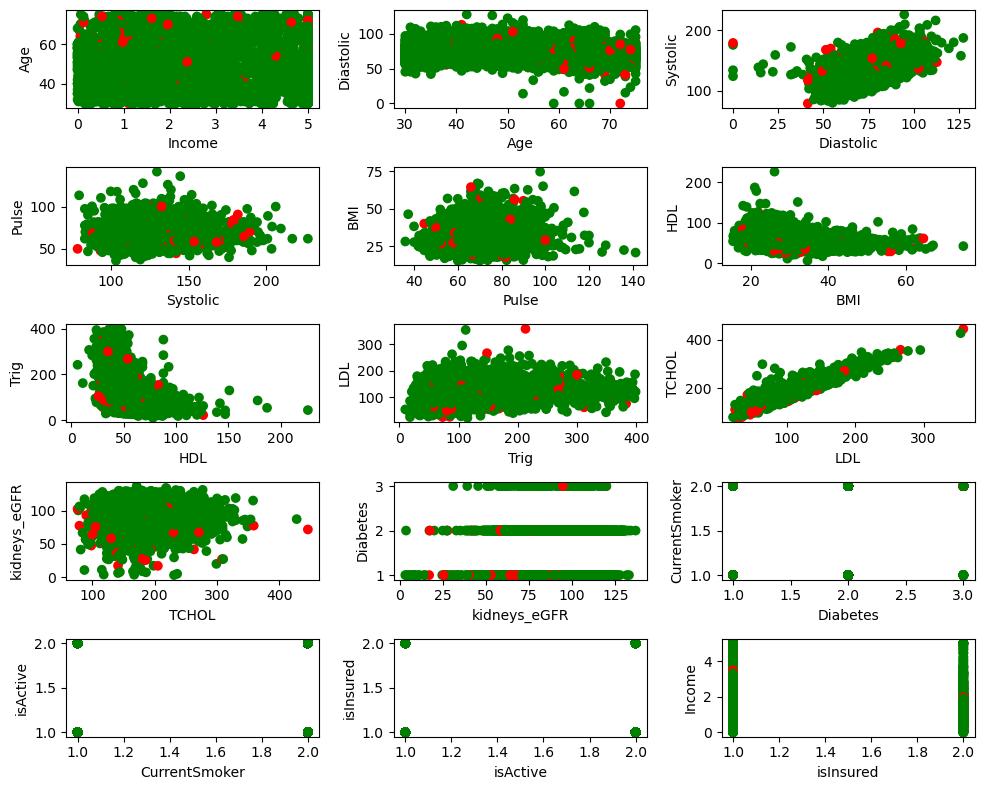